In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
import statsmodels
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 50
pd.options.display.max_columns = 200
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df= web.DataReader('BTC-USD', data_source='yahoo', start='2015-01-01', end=dt.datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8.036550e+06,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7.860650e+06,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,3.305440e+07,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,5.562910e+07,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,4.396280e+07,274.473999
...,...,...,...,...,...,...
2021-12-13,50205.000000,45894.847656,50114.742188,46737.480469,3.216673e+10,46737.480469
2021-12-14,48431.398438,46424.496094,46709.824219,46612.632812,3.463862e+10,46612.632812
2021-12-15,49473.957031,46671.964844,48379.753906,48896.722656,3.654183e+10,48896.722656


In [3]:
#df=np.round(df, decimals = 4)
#df

In [4]:
#df=df.apply(np.ceil)
#df

In [5]:
#df = pd.DataFrame(df)

In [6]:
#df['High'].round(decimals = 3)
#df

In [7]:
round(df.isna().sum()/len(df),4)*100

High         0.0
Low          0.0
Open         0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64

In [8]:
df_box_=df['2020-2':'2020-4']['Close']
df_box_

Date
2020-02-01    9392.875000
2020-02-02    9344.365234
2020-02-03    9293.521484
2020-02-04    9180.962891
2020-02-05    9613.423828
                 ...     
2020-04-26    7679.867188
2020-04-27    7795.601074
2020-04-28    7807.058594
2020-04-29    8801.038086
2020-04-30    8658.553711
Name: Close, Length: 89, dtype: float64

In [9]:
df_box= df['2020-3':]['Close']
df_box

Date
2020-03-01     8562.454102
2020-03-02     8869.669922
2020-03-03     8787.786133
2020-03-04     8755.246094
2020-03-05     9078.762695
                  ...     
2021-12-13    46737.480469
2021-12-14    46612.632812
2021-12-15    48896.722656
2021-12-16    47665.425781
2021-12-17    47231.054688
Name: Close, Length: 653, dtype: float64

Text(0.5, 1.0, 'Daily Price: 2020/3 - present time')

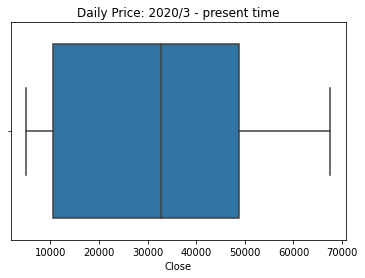

In [10]:
sns.boxplot(df_box)
plt.title('Daily Price: 2020/3 - present time')

In [11]:
df_trendstart= df['2020-2':'2021-4']
df_trendstart

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-01,9439.323242,9313.239258,9346.357422,9392.875000,2.592266e+10,9392.875000
2020-02-02,9468.797852,9217.824219,9389.820312,9344.365234,3.083574e+10,9344.365234
2020-02-03,9540.372070,9248.633789,9344.683594,9293.521484,3.093410e+10,9293.521484
2020-02-04,9331.265625,9112.811523,9292.841797,9180.962891,2.989318e+10,9180.962891
2020-02-05,9701.299805,9163.704102,9183.416016,9613.423828,3.522206e+10,9613.423828
...,...,...,...,...,...,...
2021-04-26,54288.003906,48852.796875,49077.792969,54021.753906,5.828404e+10,54021.753906
2021-04-27,55416.964844,53319.187500,54030.304688,55033.117188,4.944822e+10,55033.117188
2021-04-28,56227.207031,53887.917969,55036.636719,54824.703125,4.800057e+10,54824.703125


<AxesSubplot:title={'center':'BTC-USD Daily Price & 50 Day SMA'}, xlabel='Date'>

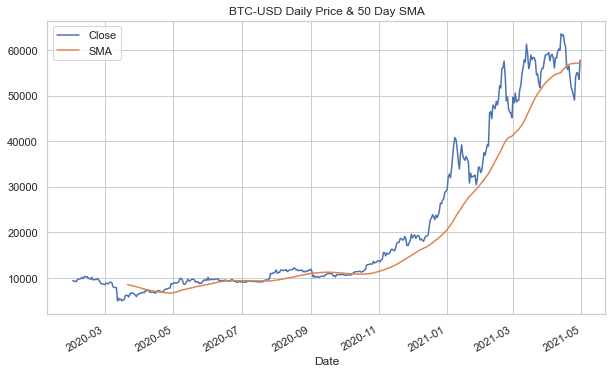

In [12]:
# Calculate & display 50 day SMA
sns.set_theme(style="whitegrid")
df_trendstart['SMA'] = df_trendstart['Close'].rolling(50).mean()
df_trendstart[['Close', 'SMA']].plot(title='BTC-USD Daily Price & 50 Day SMA',figsize=(10,6))


Text(0.5, 1.0, 'BTC-Volume')

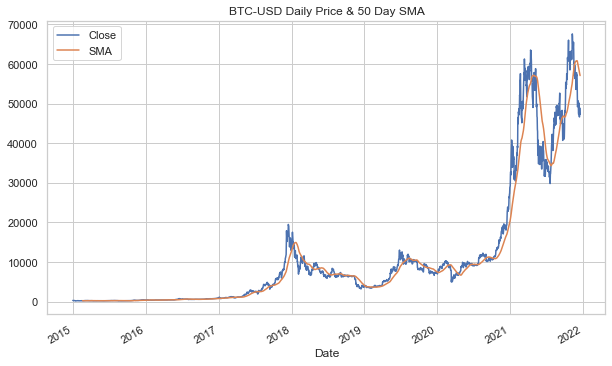

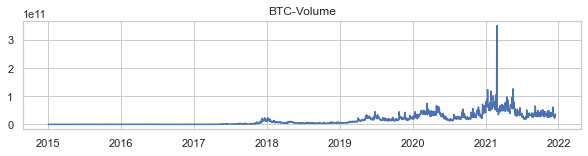

In [13]:
# Calculate & display 50 day SMA
sns.set_theme(style="whitegrid")
df['SMA'] = df['Close'].rolling(50).mean()
df[['Close', 'SMA']].plot(title='BTC-USD Daily Price & 50 Day SMA',figsize=(10,6))
fig, ax = plt.subplots(figsize=(10,2))
ax.plot(df['Volume'])
ax.set_title('BTC-Volume')

In [14]:

volume_max=df['2021-2':'2021-4']['Volume']
volume_max.values.max()


350967941479.0

In [15]:
df.loc[df['Volume'] == 350967941479.0]

,High,Low,Open,Close,Volume,Adj Close,SMA
Date,,,,,,,
2021-02-26,48370.785156,44454.84375,47180.464844,46339.761719,3.509679e+11,46339.761719,40892.312227


In [16]:
volume_max.values.mean()

65087853637.96629

In [17]:
df['Volume'].mean()

14822339647.183931

In [18]:
df_pct=df['2015-1-01':'2021-12'].resample('1Y').agg({'Close':'mean','High':'max','Low':'min','Volume':'sum'})
df_pct

,Close,High,Low,Volume
Date,,,,
2015-12-31,272.453381,495.562012,171.509995,1.237553e+10
2016-12-31,568.492407,979.396973,354.914001,3.144837e+10
2017-12-31,4006.033629,20089.000000,755.755981,8.697464e+11
2018-12-31,7572.298947,17712.400391,3191.303467,2.213197e+12
2019-12-31,7395.246282,13796.489258,3391.023682,6.106628e+12
2020-12-31,11125.798836,29244.876953,4106.980957,1.156902e+13
2021-12-31,47392.269932,68789.625000,28722.755859,1.683150e+13


In [19]:
df_pct['pct_change_close']=df_pct['Close'].pct_change()*100
df_pct 
df_pct = df_pct.rename(columns={'Close': 'btc_close_mean','High': 'btc_high_max','Low': 'btc_low_min','Volume': 'btc_volume_sum'})
df_pct

,btc_close_mean,btc_high_max,btc_low_min,btc_volume_sum,pct_change_close
Date,,,,,
2015-12-31,272.453381,495.562012,171.509995,1.237553e+10,NaN
2016-12-31,568.492407,979.396973,354.914001,3.144837e+10,108.656764
2017-12-31,4006.033629,20089.000000,755.755981,8.697464e+11,604.676717
2018-12-31,7572.298947,17712.400391,3191.303467,2.213197e+12,89.022351
2019-12-31,7395.246282,13796.489258,3391.023682,6.106628e+12,-2.338163
2020-12-31,11125.798836,29244.876953,4106.980957,1.156902e+13,50.445278
2021-12-31,47392.269932,68789.625000,28722.755859,1.683150e+13,325.967345


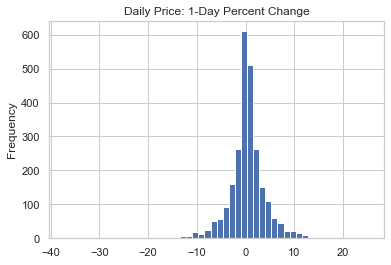

In [20]:
# Histogram of the daily price change percent of 'Last' price
df_pct_daily=df['Close'].pct_change()*100

df_pct_daily.plot.hist(bins=50)
plt.title('Daily Price: 1-Day Percent Change')
plt.show() 

In [21]:
df=df['2017-6':'2021-12-16']
df

,High,Low,Open,Close,Volume,Adj Close,SMA
Date,,,,,,,
2017-06-01,2448.389893,2288.330078,2288.330078,2407.879883,1.653180e+09,2407.879883,1669.271587
2017-06-02,2488.550049,2373.320068,2404.030029,2488.550049,1.317030e+09,2488.550049,1695.656987
2017-06-03,2581.909912,2423.570068,2493.719971,2515.350098,1.514950e+09,2515.350098,1722.613188
2017-06-04,2585.889893,2452.540039,2547.790039,2511.810059,1.355120e+09,2511.810059,1749.398989
2017-06-05,2686.810059,2510.219971,2512.399902,2686.810059,1.369310e+09,2686.810059,1779.476392
...,...,...,...,...,...,...,...
2021-12-12,50724.867188,48725.851562,49354.855469,50098.335938,2.193922e+10,50098.335938,58391.172266
2021-12-13,50205.000000,45894.847656,50114.742188,46737.480469,3.216673e+10,46737.480469,58107.305156
2021-12-14,48431.398438,46424.496094,46709.824219,46612.632812,3.463862e+10,46612.632812,57778.761328


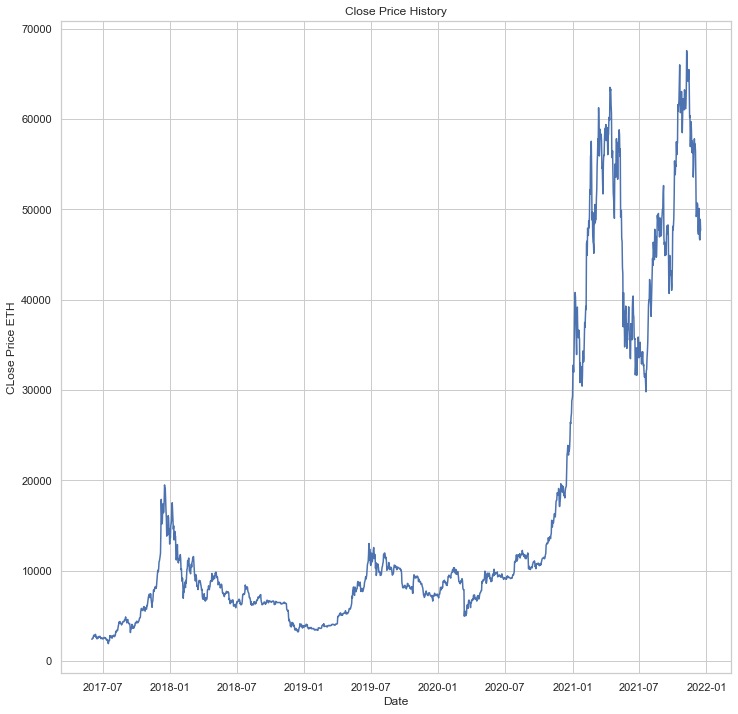

In [22]:
plt.figure(figsize=(12,12))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('CLose Price ETH', fontsize=12)
plt.show()

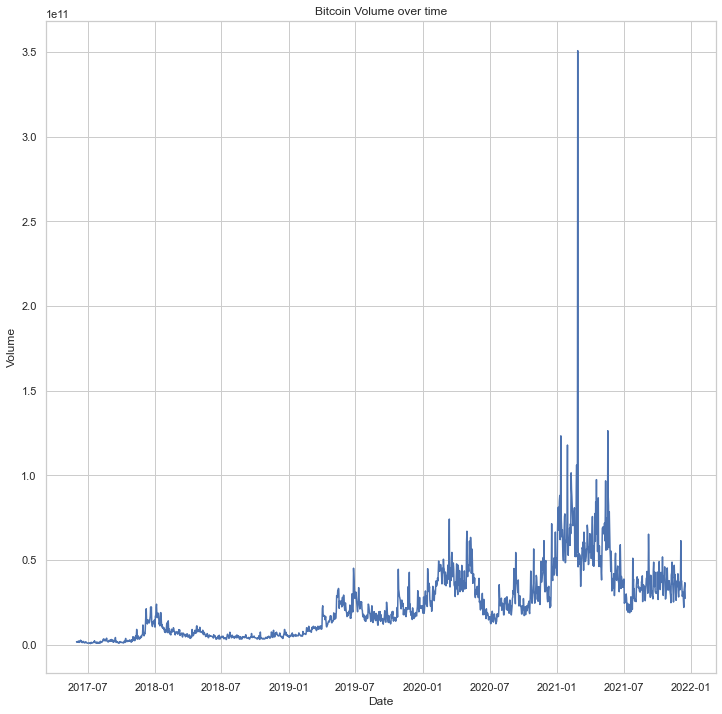

In [23]:
plt.figure(figsize=(12,12))
plt.title('Bitcoin Volume over time')
plt.plot(df['Volume'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.show()

In [24]:
newdf = df.filter(["Close",'Volume',"Open",'High', 'Low'], axis=1)
newdf

,Close,Volume,Open,High,Low
Date,,,,,
2017-06-01,2407.879883,1.653180e+09,2288.330078,2448.389893,2288.330078
2017-06-02,2488.550049,1.317030e+09,2404.030029,2488.550049,2373.320068
2017-06-03,2515.350098,1.514950e+09,2493.719971,2581.909912,2423.570068
2017-06-04,2511.810059,1.355120e+09,2547.790039,2585.889893,2452.540039
2017-06-05,2686.810059,1.369310e+09,2512.399902,2686.810059,2510.219971
...,...,...,...,...,...
2021-12-12,50098.335938,2.193922e+10,49354.855469,50724.867188,48725.851562
2021-12-13,46737.480469,3.216673e+10,50114.742188,50205.000000,45894.847656
2021-12-14,46612.632812,3.463862e+10,46709.824219,48431.398438,46424.496094


In [25]:
X=newdf.drop("Close", axis=1)
y=newdf.Close

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Scikit-learning 
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)

# Main metrics
print('R2:', r2_score(y_test, predictions))
print('MAE:', mae(y_test, predictions))
print('MSE:', mse(y_test, predictions, squared=False))

R2: 0.9993286553043392
MAE: 203.6896836266765
MSE: 420.30971682085095


In [28]:
# Using Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)

predicted_price = regressor.predict(X_test)


print('R2:', r2_score(y_test, predicted_price))
print('MAE:', mae(y_test, predicted_price)) 
print('MSE:', mse(y_test,predicted_price, squared=False)) 
print('Root MSE:', np.sqrt(mse(y_test, predicted_price)))

R2: 0.999066583815895
MAE: 270.384128072348
MSE: 495.603440537174
Root MSE: 495.603440537174


### Scaling
+ Normalize the range of independent variables.

In [29]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [30]:
X_train.columns

Index(['Volume', 'Open', 'High', 'Low'], dtype='object')

In [31]:
# OLS Regression
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.296e+05
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:03:52   Log-Likelihood:                -9787.6
No. Observations:                1324   AIC:                         1.959e+04
Df Residuals:                    1319   BIC:                         1.961e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.668e+04     10.818   1542.308      0.0

In [32]:
# Sckit-learning
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

y
y_pred=model.predict(X_test_scaled)   # model prediction


y_pred_train=model.predict(X_train_scaled)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mae(y_test, y_pred))
print('MSE:', mse(y_test,y_pred, squared=False))

R2: 0.9993286553043493
MAE: 203.68968362454484
MSE: 420.3097168176789


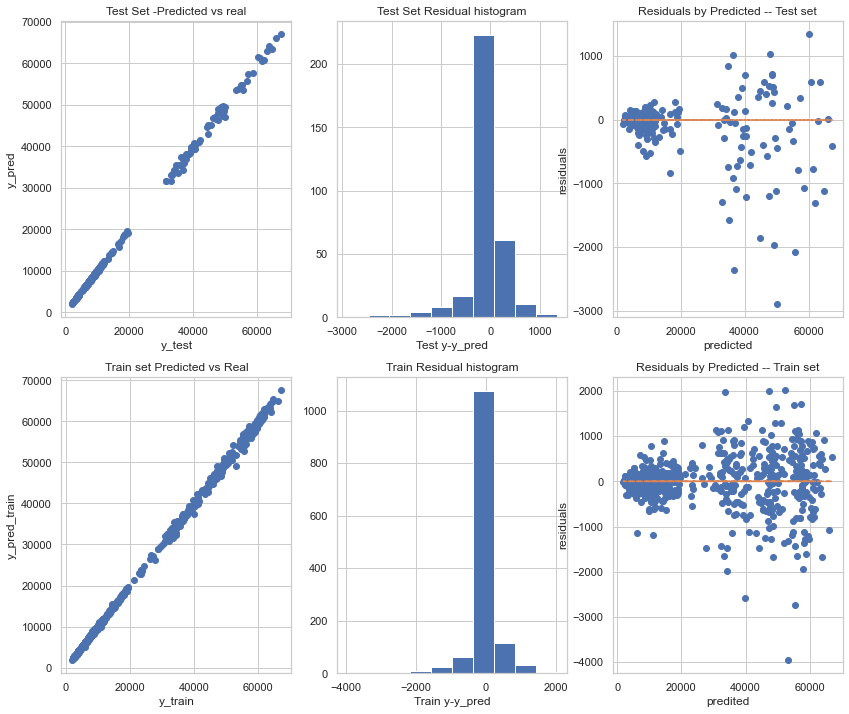

In [33]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,3,figsize=(14,12))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[0,2].plot(y_pred,y_test - y_pred,"o")
ax[0,2].set_xlabel("predicted")
ax[0,2].set_ylabel("residuals")
ax[0,2].set_title("Residuals by Predicted -- Test set")
ax[0,2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs Real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

ax[1,2].plot(y_pred_train,y_train - y_pred_train,"o")
ax[1,2].set_xlabel("predited")
ax[1,2].set_ylabel("residuals")
ax[1,2].set_title("Residuals by Predicted -- Train set")
ax[1,2].plot(y_pred_train,np.zeros(len(y_pred_train)),linestyle='dashed')

In [34]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
Date,,
2021-06-07,33560.707031,35136.004900
2018-07-19,7466.859863,7389.923847
2019-09-17,10241.272461,10188.172351
2018-10-04,6576.689941,6552.807040
2021-03-06,48912.382812,47877.474769
...,...,...
2017-11-11,6357.600098,6568.994984
2018-08-26,6707.259766,6649.063745
2018-12-13,3313.677246,3353.445294


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

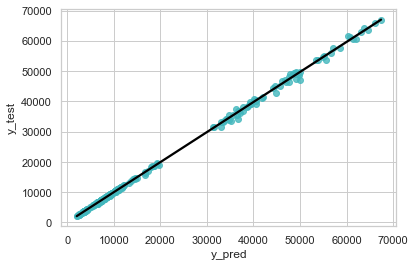

In [35]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "#42B7BD"}, line_kws={"color": "black"})

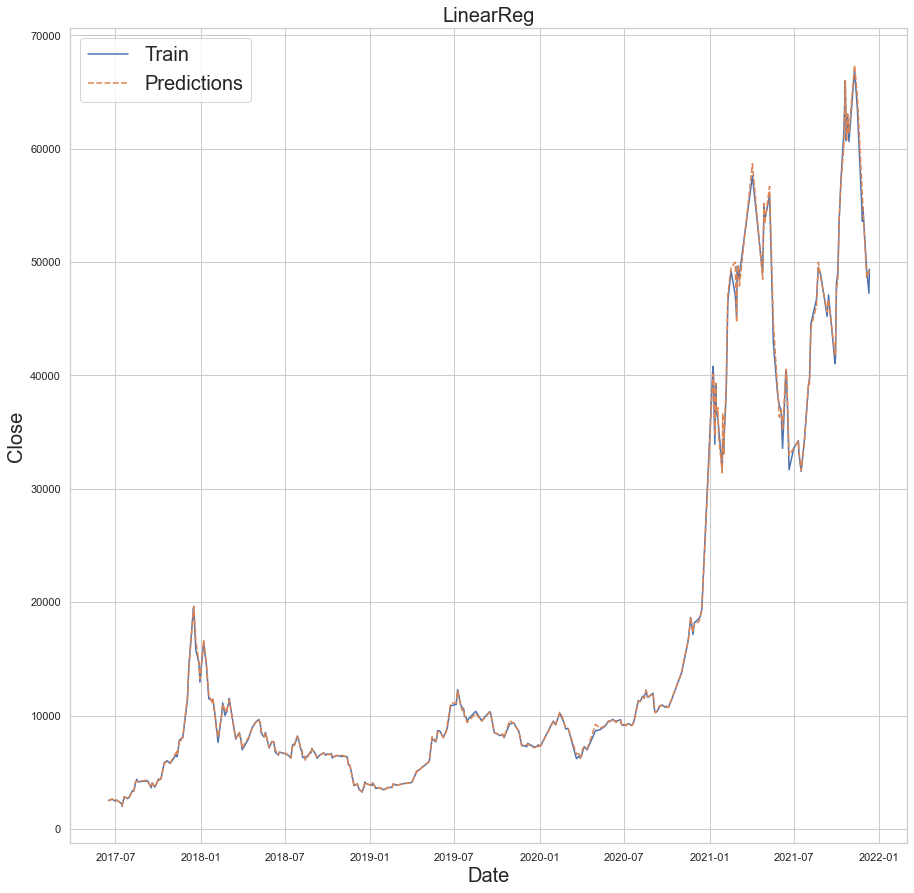

In [36]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid")
sns.lineplot(data=result)
plt.title('LinearReg', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close', fontsize=20)
plt.legend(['Train','Predictions'], fontsize=20)

## Feature Importance

In [37]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by=["Importance"], ascending=False)

In [38]:
round(features_importances.head(50),1)

,Attribute,Importance
2,High,16475.8
3,Low,9770.0
1,Open,9087.1
0,Volume,14.4


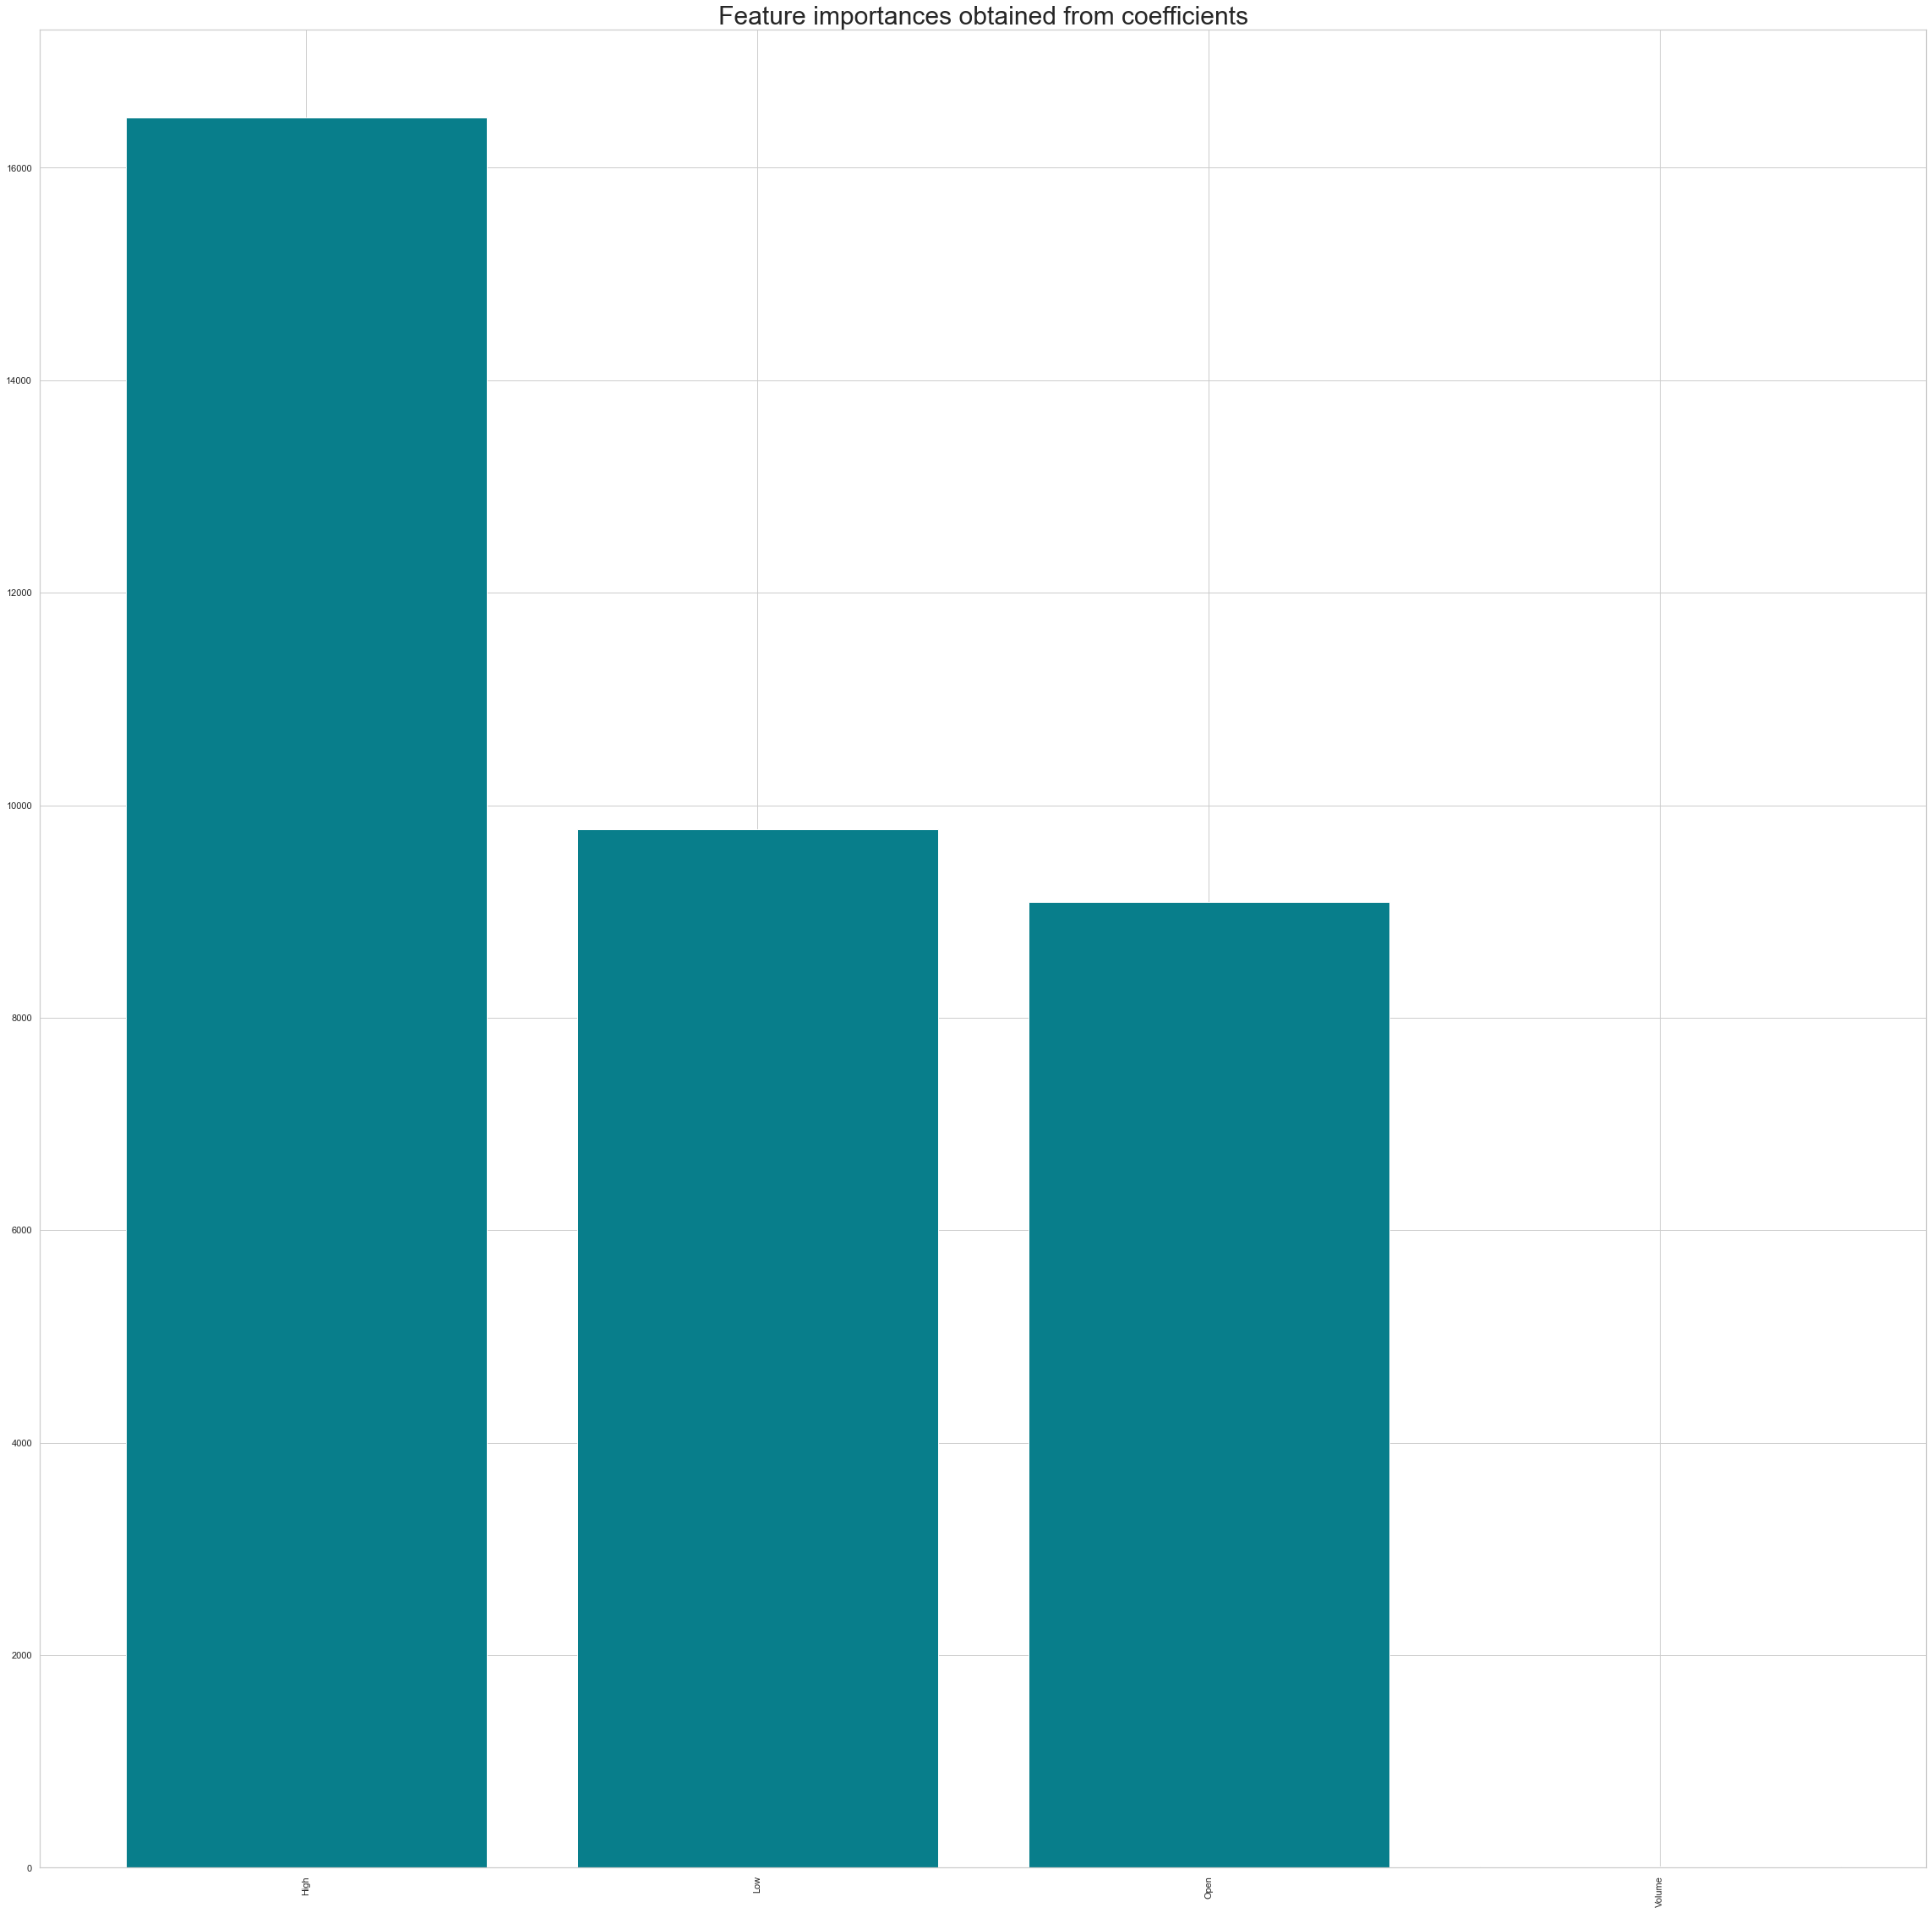

In [39]:
plt.figure(figsize=(40,40))
plt.bar(x=features_importances['Attribute'], height=features_importances["Importance"], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=30)
plt.xticks(rotation='vertical')
plt.show()